In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
file = Path ('Shill Bidding Dataset.csv')
df = pd.read_csv(file)

classes = df['Bidder_ID']
df1=df.drop(['Bidder_ID'], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df1)

new_df1 = pd.DataFrame(scaler_data, columns=df1.columns)
new_df1.head()


,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,-1.726424,-0.692374,0.291571,2.070638,-0.371076,-1.218447,-0.907433,1.063074,-1.131055,0.684785,0.156058,-0.345765
1,-1.726195,-0.692374,-0.599542,0.549957,-0.371076,-1.183993,-0.907433,1.063074,-1.096663,1.321104,0.156058,-0.345765
2,-1.725966,-0.692374,0.001606,0.549957,-0.371076,-1.210517,-0.907433,1.063074,-1.123139,1.448368,0.156058,-0.345765
3,-1.725737,-0.692374,-0.215868,0.549957,-0.371076,-0.962047,-0.907433,1.063074,-0.875118,1.448368,0.156058,-0.345765
4,-1.725508,-0.464024,-0.463082,0.718921,-0.371076,-1.215053,-0.907433,-0.965191,-1.127866,0.302994,0.966946,-0.345765


In [11]:
new_df1.shape

(6321, 12)

In [12]:
from sklearn.decomposition import PCA

pca = PCA (n_components=0.90)
new_df1_pca = pca.fit_transform(new_df1)

new_df1_pca.shape

(6321, 8)

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42, learning_rate= 400)
tsne_features = tsne.fit_transform(new_df1_pca)
tsne_features.shape

c:\Users\panzh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6321, 3)

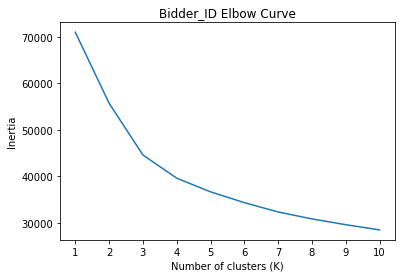

In [18]:
from sklearn.cluster import KMeans
inertia =[]
k = list (range(1,11))

for i in k:
    km = KMeans (n_clusters=i, random_state= 0)
    km.fit (new_df1_pca)
    inertia.append (km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot (df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Bidder_ID Elbow Curve')
plt.show()